# 최적의 하이퍼 파라미터 찾아주기

randomized-searched CV 알고리즘을 이용해서,
최고의 성능을 보여주는 모델의 파라미터를 알 수 있다.

이때, for문을 이용해서 다양한 알고리즘(의사결정나무, 랜덤포레스트, 그레디언트 부스트) 각각의 최적화된 하이퍼 파라미터를 구할 수 있었다.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv("diabetes.csv")
X, y = df.drop("Outcome", axis = 1), df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle = True, random_state = 42)
print("X_train.shape = {}, y_train.shape = {}".format(X_train.shape, y_train.shape))


model = [DecisionTreeClassifier(random_state = 42),
         RandomForestClassifier(random_state = 42),
         GradientBoostingClassifier(random_state = 42)]

max_depth = np.random.randint(2,20,10)
max_features = np.random.uniform(0.3,1.0,100)

param_distributions = {"max_depth": max_depth,
                      "max_features": max_features}


X_train.shape = (537, 8), y_train.shape = (537,)


In [25]:
results = []
for estimator in model:
    result = []
    #이렇게 하려면 Decision tree가 제일먼저 나와있는게 맞음
    if estimator.__class__.__name__ != "DecisionTreeClassifier":
        param_distributions["n_estimators"] = np.random.randint(100,200,10) # 트리의 개수
    

    # 조각을 cv개 만큼 가지고, n_iter만큼 돌린다!
    clf = RandomizedSearchCV(estimator,
                       param_distributions,
                       n_iter = 100,
                       scoring = "accuracy",
                       n_jobs = -1,
                       cv = 5,
                       verbose = 2)
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)
    

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.9min finished


In [29]:
pd.DataFrame(results, columns = ["estimator", "best_params_", "train_score_", "test_score", "cv_result"])



,estimator,best_params_,train_score_,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.5752270150867969, 'max_dept...",0.756092,0.679654,"{'mean_fit_time': [0.005852031707763672, 0.008..."
1,RandomForestClassifier,"{'n_estimators': 145, 'max_features': 0.320479...",0.783956,0.744589,"{'mean_fit_time': [0.45963053703308104, 0.3928..."
2,GradientBoostingClassifier,"{'n_estimators': 106, 'max_features': 0.304934...",0.780253,0.735931,"{'mean_fit_time': [1.155685043334961, 1.249501..."


# cross validation으로 학습 세트의 오차 측정하기

In [36]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor(random_state=42)

DecisionTreeRegressor(random_state=42)

In [47]:
train, test =df[df["Insulin"] != 0] , df[df["Insulin"] == 0]

X_train, y_train = train.drop("Insulin", axis = 1), train["Insulin"]
X_test, y_test = test.drop("Insulin", axis = 1), test["Insulin"]

print("X_train = {}, y_train = {}".format(X_train.shape, y_train.shape))
print("X_test = {}, y_test = {}".format(X_test.shape, y_test.shape))


X_train = (394, 8), y_train = (394,)
X_test = (374, 8), y_test = (374,)


In [49]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv=5, verbose = 2, n_jobs = -1) 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


-0.14429295602725567


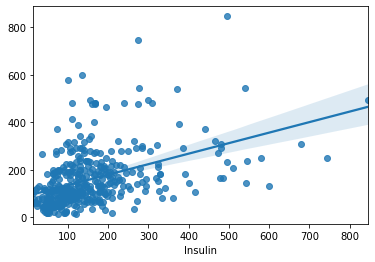

In [51]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_predict))

sns.regplot(y_train, y_predictb)

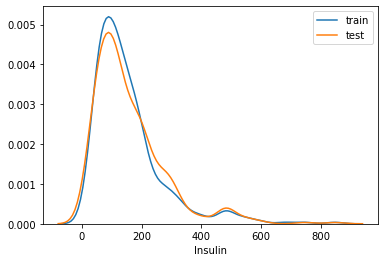

In [53]:
sns.distplot(y_train, hist = False, label = "train")
sns.distplot(y_predict, hist = False, label = "test")


In [63]:
from sklearn.model_selection import cross_validate
result = cross_validate(model, X_train, y_train, cv=5, verbose = 2, n_jobs = -1) 

result



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00577188, 0.00750017, 0.00868177, 0.00700593, 0.00668287]),
 'score_time': array([0.00233507, 0.00300288, 0.00308728, 0.00356007, 0.00194311]),
 'test_score': array([-0.12504799, -0.09771626, -0.07372737, -0.55075768, -0.02250719])}

- Cross_val_predict를 통해서 모델을 학습할 때, K-fold를 만들어줄 수 있다. 

- 비지도 학습에서는 불가능한 것 같다. --> API 문서에 Supervised learning이라고 명시됌

- 기본적으로 X, y가 존재해야 하기 때문이다.

- 따라서 nan으로 되어있는 인슐린 값을 찾기에는 부적합하다.

- 그렇지만, 학습의 시간과 테스트에 score에 대해서 이해할 수 있다.

# 5.1.8 RandomizedSearchCV 로 최적의 파라메터 값 찾기

In [73]:
from sklearn.tree import DecisionTreeRegressor

max_depth = np.random.randint(5,30,10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions= {"max_depth":max_depth,
                      "max_features":max_features}
model = DecisionTreeRegressor()

In [74]:
from sklearn.model_selection import RandomizedSearchCV

regressor = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=10,
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state = 42)
regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    2.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([25, 28, 10, 16, 20,  9, 29,  9, 20, 15]),
                                        'max_features': array([0.68958948, 0.53287652, 0.45750396, 0.87608044, 0.98296963,
       0.62021344, 0.5844859 , 0.75492389, 0.3363244 , 0.41839725])},
                   random_state=42, verbose=2)

In [75]:
regressor.best_params_

{'max_features': 0.876080439762821, 'max_depth': 9}

In [76]:
regressor.best_estimator_

DecisionTreeRegressor(max_depth=9, max_features=0.876080439762821)

In [77]:
regressor.best_score_

-0.1193153907410053

# 5.1.9 RandomizedSearchCV 로 최적의 모델 찾기

In [82]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


estimators = [DecisionTreeRegressor(random_state = 42),
          RandomForestRegressor(random_state = 42),
          GradientBoostingRegressor(random_state = 42)
         ]

In [88]:
param_distributions ={"max_depth": np.random.randint(10,100,20),
    "max_features":np.random.uniform(0.3,1.0,100)
}

results = []
for estimator in estimators:
    result = []
    if not estimator.__class__.__name__ == "DecisionTreeRegressor":
        param_distributions["n_estimators"] = np.random.randint(10,100,20)  
    regressor = RandomizedSearchCV(
        estimator,
        param_distributions,
        n_iter=10,
        n_jobs = -1,
        refit=True,
        cv = 5,
        verbose=2)
    regressor.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished


In [91]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator","r2_score","cv_result"]

In [101]:
#제일 좋은 모델을 이렇게 뽑아낼 수 있구나!

best_model = df_cv.loc[1,"estimator"]
best_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=84, max_features=0.8523786410919287,
                      n_estimators=99, random_state=42)

# Cross validation으로 학습 세트의 오차 측정하기

cross validation을 통해서 우리가 나눈 각각의 모의고사(cv =4)라고 한다면, 각각의 
fit_time, score_time, test_score이 총 4개 나오는 것임!

In [105]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

y_predict = cross_val_predict(best_model, X_train, y_train, cv = 4, n_jobs = -1, verbose = 2)
temp = cross_validate(best_model, X_train, y_train, cv = 4, n_jobs = -1, verbose = 2)




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


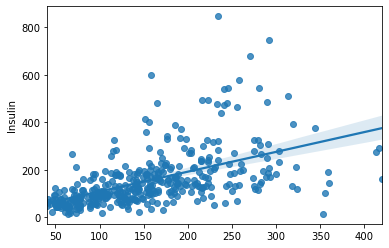

In [104]:
sns.regplot(y_predict, y_train)

In [107]:
r2_score(y_predict, y_train)

-0.7978779101048306

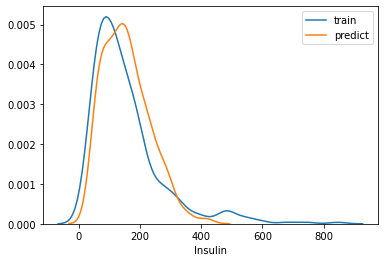

In [109]:
sns.distplot(y_train, hist = False,label = "train")
sns.distplot(y_predict, hist = False,label = "predict")


In [112]:
# error --> MSE
MSE = np.sqrt(((y_train - y_predict)**2).mean())
MSE

101.31303487241716

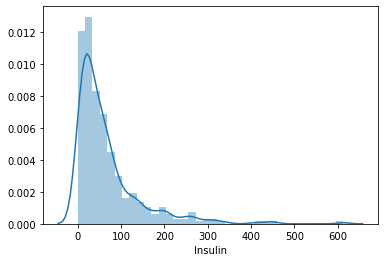

In [115]:
#MAE 방법
error = abs(y_train - y_predict)
sns.distplot(error)


In [116]:
error.describe()

count    394.000000
mean      66.266190
std       76.733744
min        0.080808
25%       19.401515
50%       43.035354
75%       82.436869
max      612.242424
Name: Insulin, dtype: float64

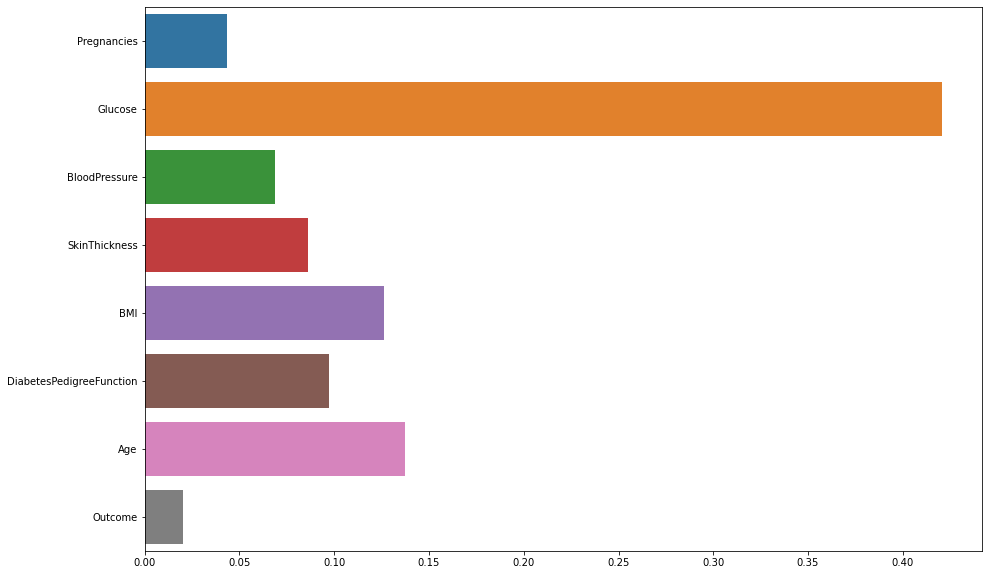

In [122]:
# 피쳐의 중요도
plt.figure(figsize= (15,10))
sns.barplot(x = best_model.feature_importances_, y = X_train.columns.tolist())

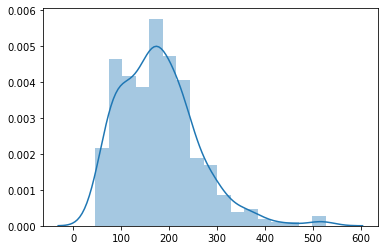

In [125]:
# 이렇게 만든 모델에 대한 회귀분석
pred = best_model.predict(X_test)
sns.distplot(pred)

# 정리

1) Cross Validate CV
- 각 학습세트에 대한 오차 및 성능에 대해서 이해할 수 있다
- 

2) RandomSearch CV
- 우리가 저장한 임의의 값 안에서 모델이 돌아간다.
- 최적화된 estimator와 hyper-parameter를 찾을 수 있다.
- 여기서 구한 best_a

3) Grid CV
- 우리가 설정한 값들을 모두다 돈다.
- 시간이 오래 걸리고, 오히려 Randomsearch CV보다 성능이 좋지 않다는 논문도 있다.

